# 给定一个B样条曲线，\sum_{i=0}^6 N_i3(u)Pi u\in [a,b]
# 解：有n-p-1 = 7个控制点， 其中p=3，则n=11

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

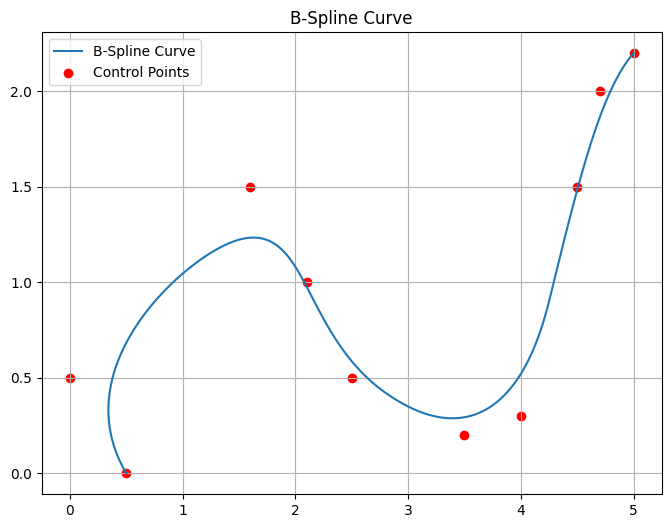

In [15]:
# 10个控制点
control_points = np.array([[0.5, 0], [0, 0.5], [1.6, 1.5], [2.1, 1], [2.5, 0.5],[3.5, 0.2], [4, 0.3], [4.5, 1.5], [4.7,2], [5, 2.2]])

# 节点矢量 (knot vector)，某个节点重合一次
knots = np.array([0,0,0,0,1,2,3,3,4,4,5,5,5,5])

# 生成B样条，k=3表示三阶
spl_x = BSpline(knots, control_points[:,0], k=3)
spl_y = BSpline(knots, control_points[:,1], k=3)


# 生成新的 x 值用于绘制曲线
x_new = np.linspace(0, 5, 1000)
x_spline1 = spl_x(x_new)
y_spline1 = spl_y(x_new)

# t取值范围（参数化范围）
t = np.linspace(0, 4, 100)

# 绘制B样条曲线
plt.figure(figsize=(8, 6))
plt.plot(x_spline1, y_spline1, label="B-Spline Curve")
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label='Control Points')
plt.title('B-Spline Curve')
plt.legend()
plt.grid(True)
plt.savefig('HW6_1.pdf', dpi=300, bbox_inches='tight')
plt.show()

# 插入3次节点，不在原节点上， \sum_{i=0}^9 N_i3(u)Pi'

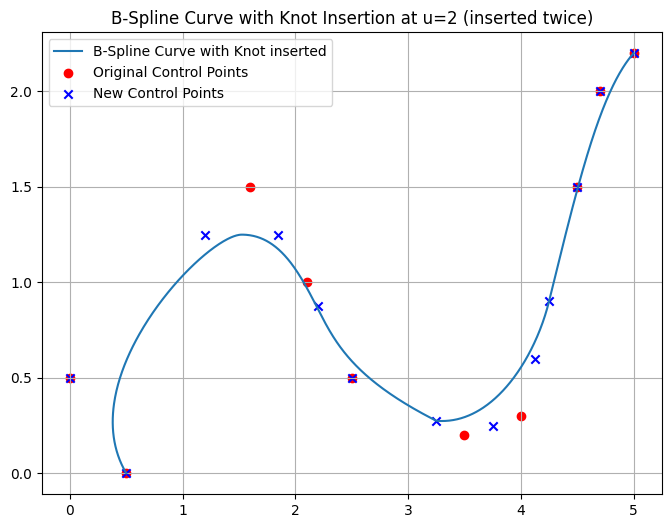

In [16]:
def insert_knot(knots, control_points, u, k, times=1):
    new_knots = knots
    new_control_points = control_points

    for _ in range(times):
        # 找到插入位置
        i = np.searchsorted(new_knots, u)

        # 插入节点
        new_knots = np.insert(new_knots, i, u)

        # 计算新的控制点
        new_control_points = np.zeros((new_control_points.shape[0] + 1, new_control_points.shape[1]))
        new_control_points[:i-k] = control_points[:i-k]
        new_control_points[i-k+1:] = control_points[i-k:]

        for j in range(i-k, i):
            alpha = (u - knots[j]) / (knots[j+k] - knots[j])
            new_control_points[j] = (1.0 - alpha) * control_points[j-1] + alpha * control_points[j]

        control_points = new_control_points

    return new_knots, new_control_points

# 10个控制点
control_points = np.array([[0.5, 0], [0, 0.5], [1.6, 1.5], [2.1, 1], [2.5, 0.5],[3.5, 0.2], [4, 0.3], [4.5, 1.5], [4.7,2], [5, 2.2]])

# 节点矢量 (knot vector)，某个节点重合一次
knots = np.array([0,0,0,0,1,2,3,3,4,4,5,5,5,5])
k = 3  # B 样条的阶数

# 插入三个不同节点
u0 = 4
new_knot_v0, new_control_points_v0 = insert_knot(knots, control_points, u0, k, times=1)
u1 = 3.5
new_knot_v1, new_control_points_v1 = insert_knot(new_knot_v0, new_control_points_v0, u1, k, times=1)
u2 = 1.5
new_knots, new_control_points = insert_knot(new_knot_v1, new_control_points_v1, u2, k, times=1)

# 创建新的 B 样条对象
spl_x = BSpline(new_knots, new_control_points[:, 0], k)
spl_y = BSpline(new_knots, new_control_points[:, 1], k)

# 生成新的 x 值用于绘制曲线
x_new = np.linspace(0, 5, 1000)
x_spline1 = spl_x(x_new)
y_spline1 = spl_y(x_new)

# 绘制 B 样条曲线
plt.figure(figsize=(8, 6))
plt.plot(x_spline1, y_spline1, label="B-Spline Curve with Knot inserted")
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label='Original Control Points')
plt.scatter(new_control_points[:, 0], new_control_points[:, 1], color='blue', label='New Control Points', marker='x')
plt.title('B-Spline Curve with Knot Insertion at u=2 (inserted twice)')
plt.legend()
plt.grid(True)
plt.savefig('HW6_2.pdf', dpi=300, bbox_inches='tight')
plt.show()

# 升阶，\sum_{i=0}^? N_i6(u)Pi'

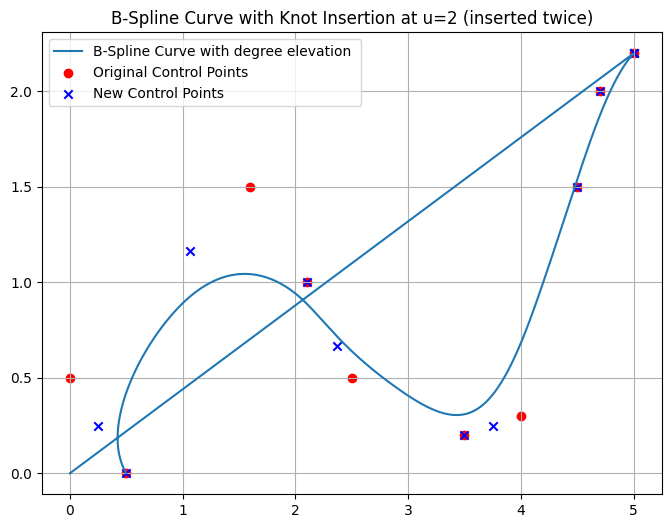

In [17]:
import numpy as np

def elevate_bspline_degree(control_points, degree, knot_vector):
    """
    将B样条曲线升阶，返回新的控制点和节点矢量。

    参数:
        control_points (np.ndarray): 控制点的数组，形状为 (n+1, d)，n 为控制点数量 - 1, d 为维度。
        degree (int): 当前B样条曲线的次数。
        knot_vector (list or np.ndarray): 当前B样条曲线的节点矢量。

    返回:
        elevated_control_points (np.ndarray): 升阶后的控制点数组。
        new_knot_vector (np.ndarray): 升阶后的节点矢量。
    """

    n = len(control_points) - 1  # 控制点数量 - 1
    p = degree  # 当前次数

    # 初始化升阶后的控制点和新节点矢量
    elevated_control_points = np.zeros((n + 2, control_points.shape[1]))
    new_knot_vector = np.zeros(len(knot_vector) + 1)

    # 复制节点矢量
    new_knot_vector[0] = knot_vector[0]
    new_knot_vector[-1] = knot_vector[-1]
    for i in range(1, len(knot_vector) - 1):
        new_knot_vector[i] = knot_vector[i]
    new_knot_vector[len(knot_vector) - 1] = (knot_vector[-2] + knot_vector[-1]) / 2

    # 升阶算法：根据递归公式计算新的控制点
    elevated_control_points[0] = control_points[0]
    for i in range(1, n + 1):
        alpha = (knot_vector[i + p] - knot_vector[i]) / (knot_vector[i + p + 1] - knot_vector[i])
        elevated_control_points[i] = (1 - alpha) * control_points[i - 1] + alpha * control_points[i]
    elevated_control_points[-1] = control_points[-1]

    return elevated_control_points, new_knot_vector

# 10个控制点
control_points = np.array([[0.5, 0], [0, 0.5], [1.6, 1.5], [2.1, 1], [2.5, 0.5],[3.5, 0.2], [4, 0.3], [4.5, 1.5], [4.7,2], [5, 2.2]])

# 节点矢量 (knot vector)，某个节点重合一次
knots = np.array([0,0,0,0,1,2,3,3,4,4,5,5,5,5])
k=3

new_control_points, new_knots = elevate_bspline_degree(control_points, 3, knots)



# 创建新的 B 样条对象
spl_x = BSpline(new_knots, new_control_points[:, 0], k)
spl_y = BSpline(new_knots, new_control_points[:, 1], k)

# 生成新的 x 值用于绘制曲线
x_new = np.linspace(0, 5, 1000)
x_spline1 = spl_x(x_new)
y_spline1 = spl_y(x_new)

# 绘制 B 样条曲线
plt.figure(figsize=(8, 6))
plt.plot(x_spline1, y_spline1, label="B-Spline Curve with degree elevation ")
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label='Original Control Points')
plt.scatter(new_control_points[:, 0], new_control_points[:, 1], color='blue', label='New Control Points', marker='x')
plt.title('B-Spline Curve with Knot Insertion at u=2 (inserted twice)')
plt.legend()
plt.grid(True)
plt.savefig('HW6_3.pdf', dpi=300, bbox_inches='tight')
plt.show()


# 对比两种情况曲线的编辑能力

# 答：因为插入节点将区间细分，所以插入节点的情况下曲线的编辑能力更好